In [1]:
# Install any missing libraries (run this first)
import sys
!{sys.executable} -m pip install pandas numpy matplotlib seaborn scikit-learn --quiet

print("✅ All libraries installed successfully!")

✅ All libraries installed successfully!



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
python.exe -m pip install --upgrade pip

SyntaxError: invalid syntax (842801469.py, line 1)

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [4]:
# Load data
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print(f"Dataset loaded: {df.shape[0]} rows, {df.shape[1]} columns")
print("\nFirst 5 rows:")
df.head()

Dataset loaded: 7043 rows, 21 columns

First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Data cleaning
print("Original shape:", df.shape)

# Fix TotalCharges (has some spaces instead of numbers)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print(f"\nMissing TotalCharges: {df['TotalCharges'].isna().sum()}")

# Drop rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Convert Churn to binary (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Convert SeniorCitizen to Yes/No for consistency
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})

print(f"\nCleaned shape: {df.shape}")
print(f"Churn rate: {df['Churn'].mean()*100:.1f}%")

df.info()

Original shape: (7043, 21)

Missing TotalCharges: 11

Cleaned shape: (7032, 21)
Churn rate: 26.6%
<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 

In [6]:
# Calculate key metrics
total_customers = len(df)
churned_customers = df['Churn'].sum()
churn_rate = (churned_customers / total_customers) * 100
revenue_lost = df[df['Churn']==1]['MonthlyCharges'].sum() * 12  # Annual

print("=" * 60)
print("📊 BUSINESS IMPACT SUMMARY")
print("=" * 60)
print(f"Total Customers: {total_customers:,}")
print(f"Churned Customers: {churned_customers:,}")
print(f"Churn Rate: {churn_rate:.1f}%")
print(f"Annual Revenue at Risk: ${revenue_lost:,.0f}")
print("=" * 60)

📊 BUSINESS IMPACT SUMMARY
Total Customers: 7,032
Churned Customers: 1,869
Churn Rate: 26.6%
Annual Revenue at Risk: $1,669,570


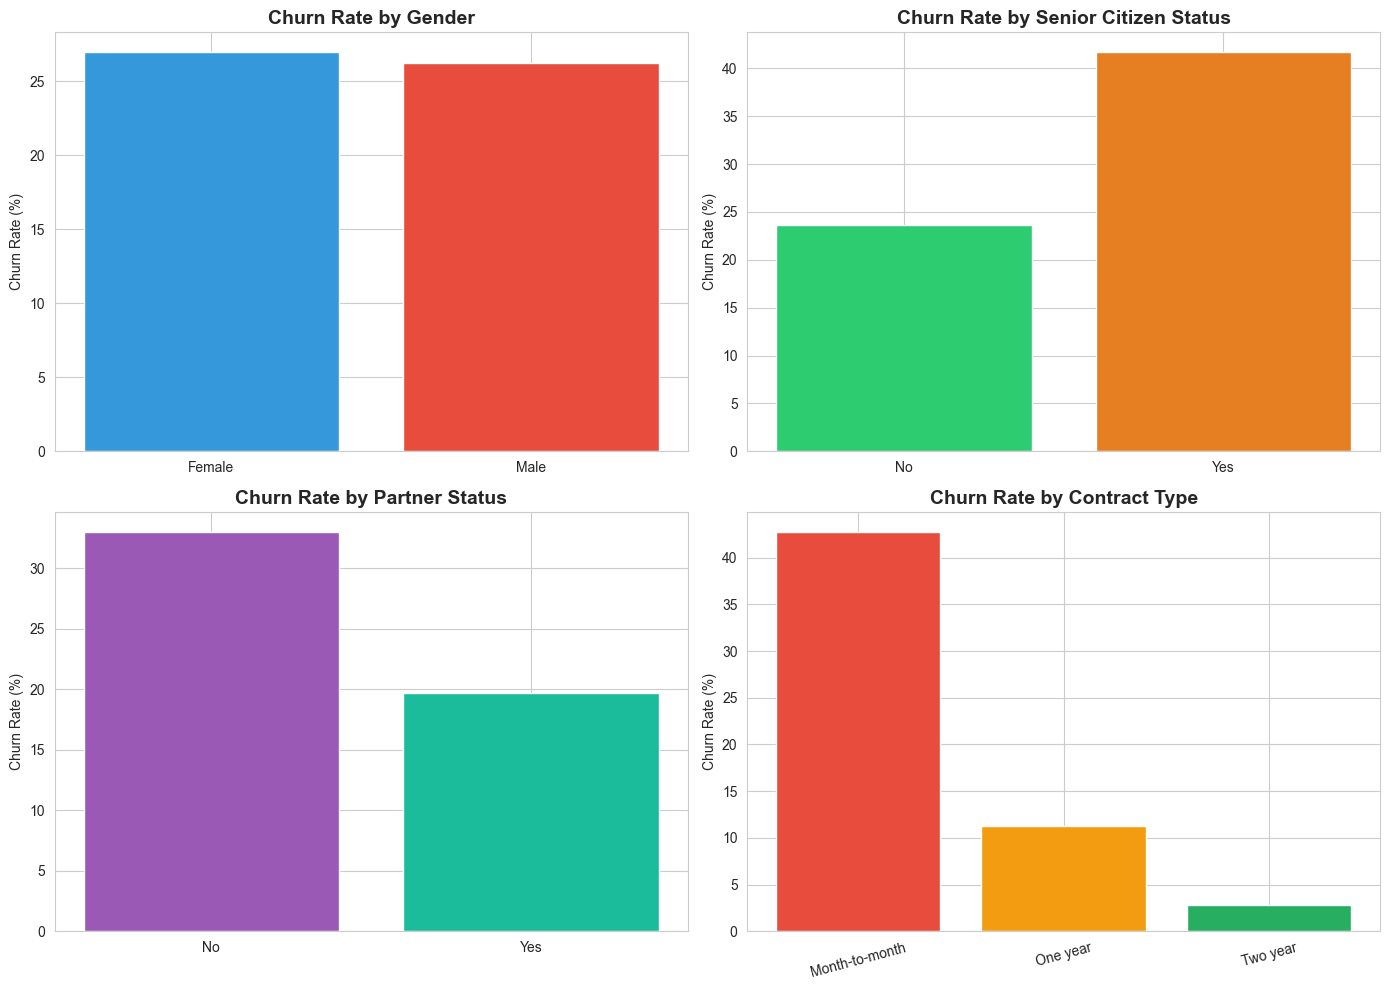

Key Finding: Month-to-month contracts have 42.7% churn vs 2.8% for 2-year


In [7]:
# Churn analysis by key demographics
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender
gender_churn = df.groupby('gender')['Churn'].mean() * 100
axes[0,0].bar(gender_churn.index, gender_churn.values, color=['#3498db', '#e74c3c'])
axes[0,0].set_title('Churn Rate by Gender', fontsize=14, fontweight='bold')
axes[0,0].set_ylabel('Churn Rate (%)')

# Senior Citizen
senior_churn = df.groupby('SeniorCitizen')['Churn'].mean() * 100
axes[0,1].bar(senior_churn.index, senior_churn.values, color=['#2ecc71', '#e67e22'])
axes[0,1].set_title('Churn Rate by Senior Citizen Status', fontsize=14, fontweight='bold')
axes[0,1].set_ylabel('Churn Rate (%)')

# Partner
partner_churn = df.groupby('Partner')['Churn'].mean() * 100
axes[1,0].bar(partner_churn.index, partner_churn.values, color=['#9b59b6', '#1abc9c'])
axes[1,0].set_title('Churn Rate by Partner Status', fontsize=14, fontweight='bold')
axes[1,0].set_ylabel('Churn Rate (%)')

# Contract Type
contract_churn = df.groupby('Contract')['Churn'].mean() * 100
contract_churn = contract_churn.sort_values(ascending=False)
axes[1,1].bar(contract_churn.index, contract_churn.values, color=['#e74c3c', '#f39c12', '#27ae60'])
axes[1,1].set_title('Churn Rate by Contract Type', fontsize=14, fontweight='bold')
axes[1,1].set_ylabel('Churn Rate (%)')
axes[1,1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.savefig('churn_demographics.png', dpi=300, bbox_inches='tight')
plt.show()

print("Key Finding: Month-to-month contracts have {:.1f}% churn vs {:.1f}% for 2-year".format(
    contract_churn.iloc[0], contract_churn.iloc[-1]))

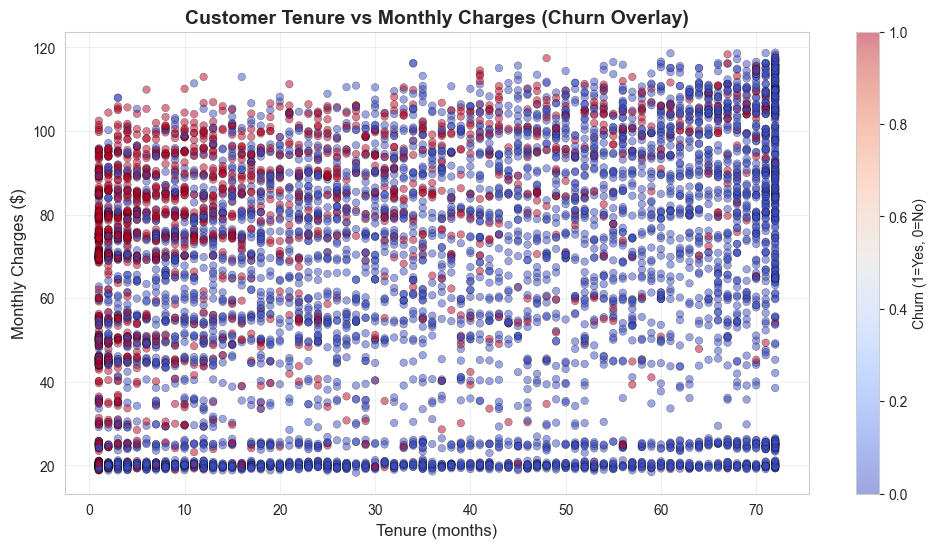

💡 Insight: High monthly charges + low tenure = highest churn risk


In [8]:
# Scatter plot: Tenure vs Monthly Charges with Churn overlay
plt.figure(figsize=(12, 6))
scatter = plt.scatter(df['tenure'], df['MonthlyCharges'], 
                     c=df['Churn'], cmap='coolwarm', 
                     alpha=0.5, s=30, edgecolors='black', linewidth=0.3)
plt.colorbar(scatter, label='Churn (1=Yes, 0=No)')
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
plt.title('Customer Tenure vs Monthly Charges (Churn Overlay)', fontsize=14, fontweight='bold')
plt.grid(alpha=0.3)
plt.savefig('tenure_charges_scatter.png', dpi=300, bbox_inches='tight')
plt.show()

print("💡 Insight: High monthly charges + low tenure = highest churn risk")

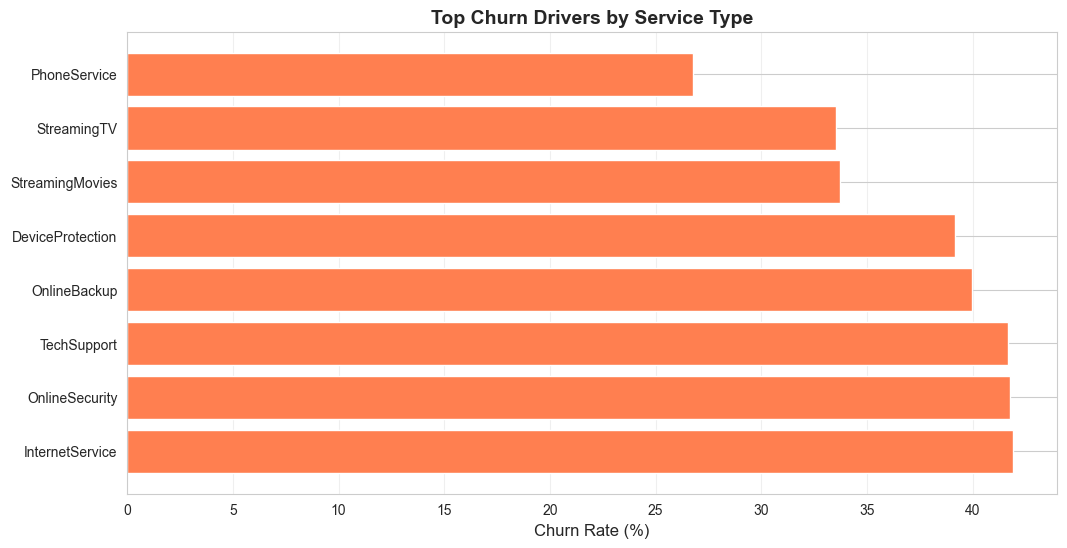

,Service,Max_Churn_Rate
1,InternetService,41.892765
2,OnlineSecurity,41.778667
5,TechSupport,41.647465
3,OnlineBackup,39.941691
4,DeviceProtection,39.140271
7,StreamingMovies,33.728875
6,StreamingTV,33.535066
0,PhoneService,26.747481


In [9]:
# Churn by service features
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 
                'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                'StreamingTV', 'StreamingMovies']

service_churn = []
for col in service_cols:
    churn_rate = df.groupby(col)['Churn'].mean().max() * 100
    service_churn.append({'Service': col, 'Max_Churn_Rate': churn_rate})

service_df = pd.DataFrame(service_churn).sort_values('Max_Churn_Rate', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(service_df['Service'], service_df['Max_Churn_Rate'], color='coral')
plt.xlabel('Churn Rate (%)', fontsize=12)
plt.title('Top Churn Drivers by Service Type', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.savefig('service_churn_drivers.png', dpi=300, bbox_inches='tight')
plt.show()

service_df

In [10]:
# Feature engineering
df_model = df.copy()

# Create dummy variables for categorical features
categorical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
                   'PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies',
                   'Contract', 'PaperlessBilling', 'PaymentMethod']

df_encoded = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)

# Drop customerID (not needed for modeling)
X = df_encoded.drop(['customerID', 'Churn'], axis=1)
y = df_encoded['Churn']

print(f"Features: {X.shape[1]}")
print(f"Target distribution:\n{y.value_counts()}")

Features: 30
Target distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64


In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
print("=" * 60)
print("🎯 MODEL PERFORMANCE")
print("=" * 60)
print(f"Accuracy: {accuracy*100:.1f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

🎯 MODEL PERFORMANCE
Accuracy: 79.4%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1033
           1       0.65      0.49      0.56       374

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



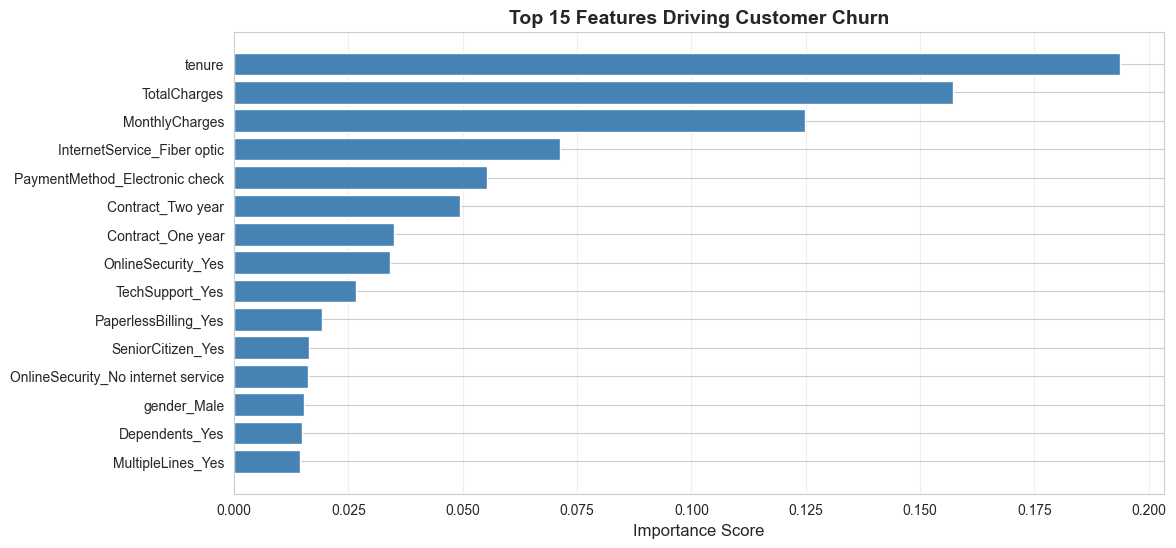

Top 5 Churn Predictors:
                           Feature  Importance
0                           tenure    0.193650
2                     TotalCharges    0.157163
1                   MonthlyCharges    0.124769
10     InternetService_Fiber optic    0.071281
28  PaymentMethod_Electronic check    0.055306


In [12]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='steelblue')
plt.xlabel('Importance Score', fontsize=12)
plt.title('Top 15 Features Driving Customer Churn', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("Top 5 Churn Predictors:")
print(feature_importance.head())

💰 HIGH-VALUE CUSTOMER ANALYSIS
Top 10% Customer Threshold: $5,979 CLV
High-Value Customer Churn: 12.2%
Regular Customer Churn: 28.2%
At-Risk Revenue: $872,537/year


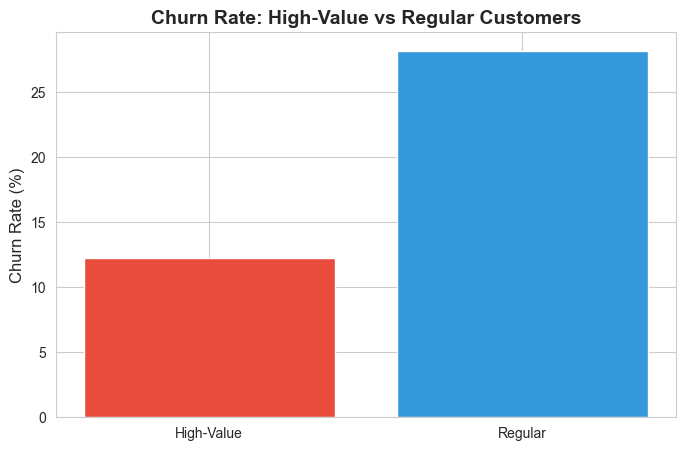

In [14]:
# Calculate Customer Lifetime Value (simplified)
df['CLV'] = df['tenure'] * df['MonthlyCharges']

# Top 10% by revenue
top_10_threshold = df['CLV'].quantile(0.9)
df['High_Value'] = df['CLV'] >= top_10_threshold

# Churn among high-value customers
high_value_churn = df[df['High_Value']==True]['Churn'].mean() * 100
regular_churn = df[df['High_Value']==False]['Churn'].mean() * 100

print("=" * 60)
print("💰 HIGH-VALUE CUSTOMER ANALYSIS")
print("=" * 60)
print(f"Top 10% Customer Threshold: ${top_10_threshold:,.0f} CLV")
print(f"High-Value Customer Churn: {high_value_churn:.1f}%")
print(f"Regular Customer Churn: {regular_churn:.1f}%")
print(f"At-Risk Revenue: ${df[df['High_Value']==True]['MonthlyCharges'].sum()*12:,.0f}/year")
print("=" * 60)

# Visualize
segments = pd.DataFrame({
    'Segment': ['High-Value', 'Regular'],
    'Churn_Rate': [high_value_churn, regular_churn]
})

plt.figure(figsize=(8, 5))
plt.bar(segments['Segment'], segments['Churn_Rate'], color=['#e74c3c', '#3498db'])
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.title('Churn Rate: High-Value vs Regular Customers', fontsize=14, fontweight='bold')
plt.savefig('high_value_churn.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# Calculate retention ROI metrics
monthly_contract_churn = df[df['Contract']=='Month-to-month']['Churn'].mean()
two_year_contract_churn = df[df['Contract']=='Two year']['Churn'].mean()
churn_reduction = (monthly_contract_churn - two_year_contract_churn) * 100

avg_monthly_charge = df['MonthlyCharges'].mean()
potential_savings = len(df[df['Contract']=='Month-to-month']) * (monthly_contract_churn - two_year_contract_churn) * avg_monthly_charge * 12

print("=" * 60)
print("📋 RETENTION STRATEGY RECOMMENDATIONS")
print("=" * 60)
print("\n1. CONTRACT OPTIMIZATION")
print(f"   • Month-to-month churn is {churn_reduction:.1f}% higher than 2-year contracts")
print(f"   • Potential annual savings: ${potential_savings:,.0f}")
print(f"   • Action: Offer 15% discount for contract upgrades")

print("\n2. SERVICE BUNDLING")
no_services = df[(df['OnlineSecurity']=='No') & (df['TechSupport']=='No')]['Churn'].mean()
print(f"   • Customers without OnlineSecurity/TechSupport: {no_services*100:.1f}% churn")
print(f"   • Action: Create 'Security Bundle' at $10/month discount")

print("\n3. HIGH-VALUE RETENTION")
print(f"   • {(df['High_Value']==True).sum()} high-value customers at risk")
print(f"   • Action: Assign dedicated account managers to top 10%")

print("\n4. EARLY INTERVENTION")
new_customers_churn = df[df['tenure']<12]['Churn'].mean()
print(f"   • Customers <12 months tenure: {new_customers_churn*100:.1f}% churn")
print(f"   • Action: 90-day check-in calls for new customers")
print("=" * 60)

📋 RETENTION STRATEGY RECOMMENDATIONS

1. CONTRACT OPTIMIZATION
   • Month-to-month churn is 39.9% higher than 2-year contracts
   • Potential annual savings: $1,201,059
   • Action: Offer 15% discount for contract upgrades

2. SERVICE BUNDLING
   • Customers without OnlineSecurity/TechSupport: 49.0% churn
   • Action: Create 'Security Bundle' at $10/month discount

3. HIGH-VALUE RETENTION
   • 704 high-value customers at risk
   • Action: Assign dedicated account managers to top 10%

4. EARLY INTERVENTION
   • Customers <12 months tenure: 48.5% churn
   • Action: 90-day check-in calls for new customers


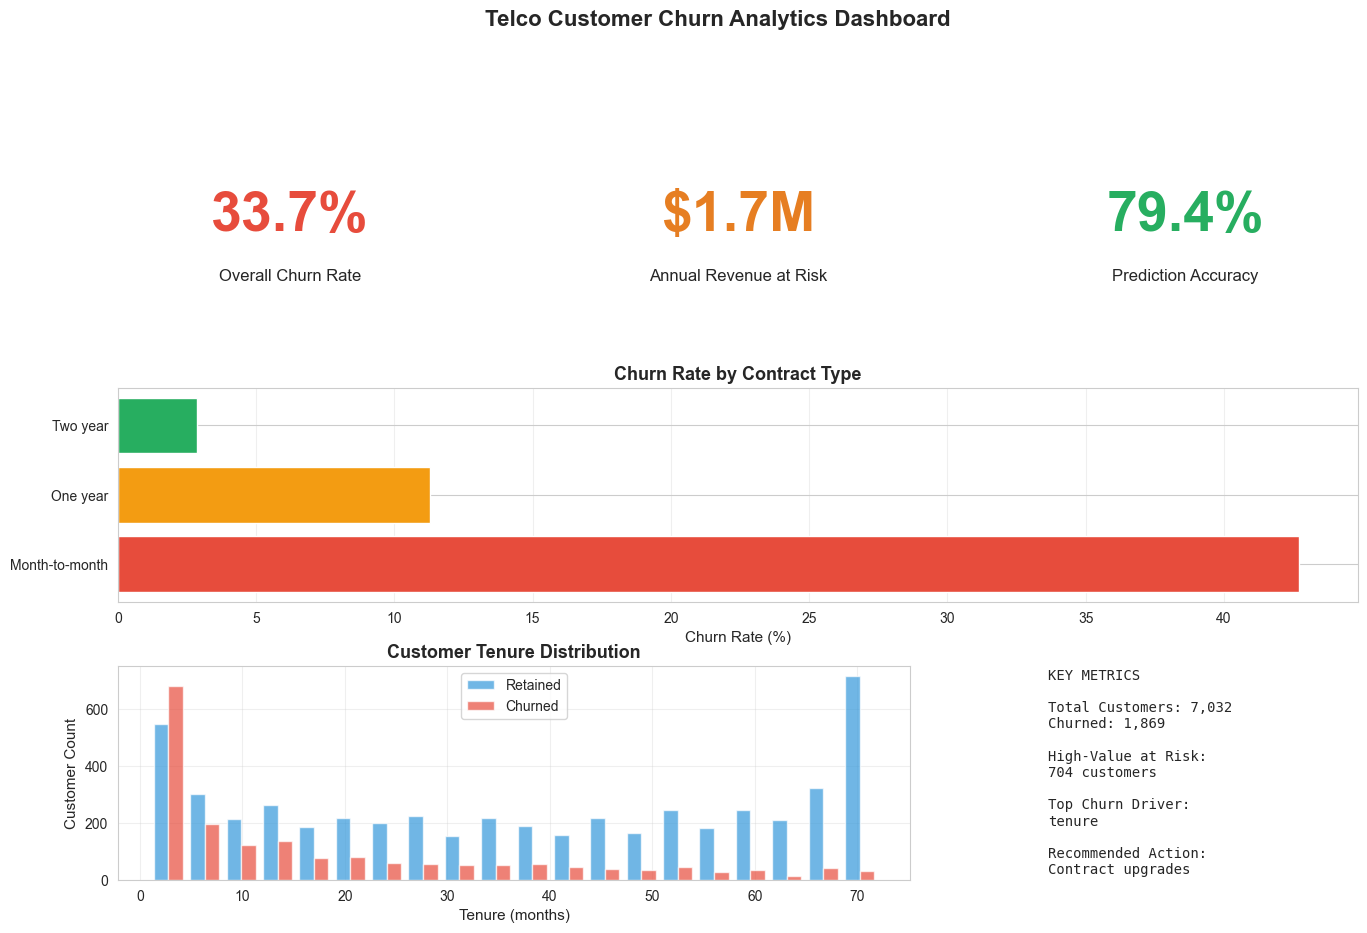

✅ Dashboard saved as 'executive_dashboard.png'


In [16]:
# Create a comprehensive dashboard
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# 1. Churn Rate Gauge
ax1 = fig.add_subplot(gs[0, 0])
ax1.text(0.5, 0.5, f'{churn_rate:.1f}%', ha='center', va='center', 
         fontsize=40, fontweight='bold', color='#e74c3c')
ax1.text(0.5, 0.2, 'Overall Churn Rate', ha='center', fontsize=12)
ax1.axis('off')

# 2. Revenue at Risk
ax2 = fig.add_subplot(gs[0, 1])
ax2.text(0.5, 0.5, f'${revenue_lost/1000000:.1f}M', ha='center', va='center',
         fontsize=40, fontweight='bold', color='#e67e22')
ax2.text(0.5, 0.2, 'Annual Revenue at Risk', ha='center', fontsize=12)
ax2.axis('off')

# 3. Model Accuracy
ax3 = fig.add_subplot(gs[0, 2])
ax3.text(0.5, 0.5, f'{accuracy*100:.1f}%', ha='center', va='center',
         fontsize=40, fontweight='bold', color='#27ae60')
ax3.text(0.5, 0.2, 'Prediction Accuracy', ha='center', fontsize=12)
ax3.axis('off')

# 4. Contract Type Churn
ax4 = fig.add_subplot(gs[1, :])
contract_data = df.groupby('Contract')['Churn'].mean().sort_values(ascending=False) * 100
ax4.barh(contract_data.index, contract_data.values, color=['#e74c3c', '#f39c12', '#27ae60'])
ax4.set_xlabel('Churn Rate (%)', fontsize=11)
ax4.set_title('Churn Rate by Contract Type', fontsize=13, fontweight='bold')
ax4.grid(axis='x', alpha=0.3)

# 5. Tenure Distribution
ax5 = fig.add_subplot(gs[2, :2])
churned = df[df['Churn']==1]['tenure']
retained = df[df['Churn']==0]['tenure']
ax5.hist([retained, churned], bins=20, label=['Retained', 'Churned'], 
         color=['#3498db', '#e74c3c'], alpha=0.7)
ax5.set_xlabel('Tenure (months)', fontsize=11)
ax5.set_ylabel('Customer Count', fontsize=11)
ax5.set_title('Customer Tenure Distribution', fontsize=13, fontweight='bold')
ax5.legend()
ax5.grid(alpha=0.3)

# 6. Key Metrics Table
ax6 = fig.add_subplot(gs[2, 2])
metrics_text = f"""
KEY METRICS

Total Customers: {total_customers:,}
Churned: {churned_customers:,}

High-Value at Risk:
{(df['High_Value']==True).sum()} customers

Top Churn Driver:
{feature_importance.iloc[0]['Feature']}

Recommended Action:
Contract upgrades
"""
ax6.text(0.1, 0.5, metrics_text, ha='left', va='center', fontsize=10, family='monospace')
ax6.axis('off')

plt.suptitle('Telco Customer Churn Analytics Dashboard', fontsize=16, fontweight='bold', y=0.98)
plt.savefig('executive_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Dashboard saved as 'executive_dashboard.png'")

In [17]:
# Create at-risk customer list
at_risk = df[df['Churn']==1][['customerID', 'tenure', 'MonthlyCharges', 
                               'TotalCharges', 'Contract', 'InternetService']]
at_risk = at_risk.sort_values('TotalCharges', ascending=False).head(100)

at_risk.to_csv('at_risk_customers_top100.csv', index=False)
print(f"✅ Exported top 100 at-risk customers to CSV")
print(f"\nSample:")
at_risk.head(10)

✅ Exported top 100 at-risk customers to CSV

Sample:


,customerID,tenure,MonthlyCharges,TotalCharges,Contract,InternetService
4610,2889-FPWRM,72,117.80,8684.80,One year,Fiber optic
1306,0201-OAMXR,70,115.55,8127.60,One year,Fiber optic
3890,3886-CERTZ,72,109.25,8109.80,One year,Fiber optic
6537,1444-VVSGW,70,115.65,7968.85,One year,Fiber optic
5581,5271-YNWVR,68,113.15,7856.00,Two year,Fiber optic
5127,8199-ZLLSA,67,118.35,7804.15,One year,Fiber optic
6289,9053-JZFKV,67,116.20,7752.30,Two year,Fiber optic
6038,1555-DJEQW,70,114.20,7723.90,Two year,Fiber optic
6398,3259-FDWOY,71,106.00,7723.70,Two year,Fiber optic
3040,7317-GGVPB,71,108.60,7690.90,Two year,Fiber optic
